In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [2]:
header_names = ['label','alcohol', 'malic_acid', 'ash', 'alcalinity_ash', 'Magnesium', 'total phenols', 'flavanoids', 'nonflavanoid_phenols','Proanthocyanins','color_intensity','hue','OD280','proline']

In [3]:
df = pd.read_csv('../data/wine.data',names=header_names)

In [4]:
df

,label,alcohol,malic_acid,ash,alcalinity_ash,Magnesium,total phenols,flavanoids,nonflavanoid_phenols,Proanthocyanins,color_intensity,hue,OD280,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


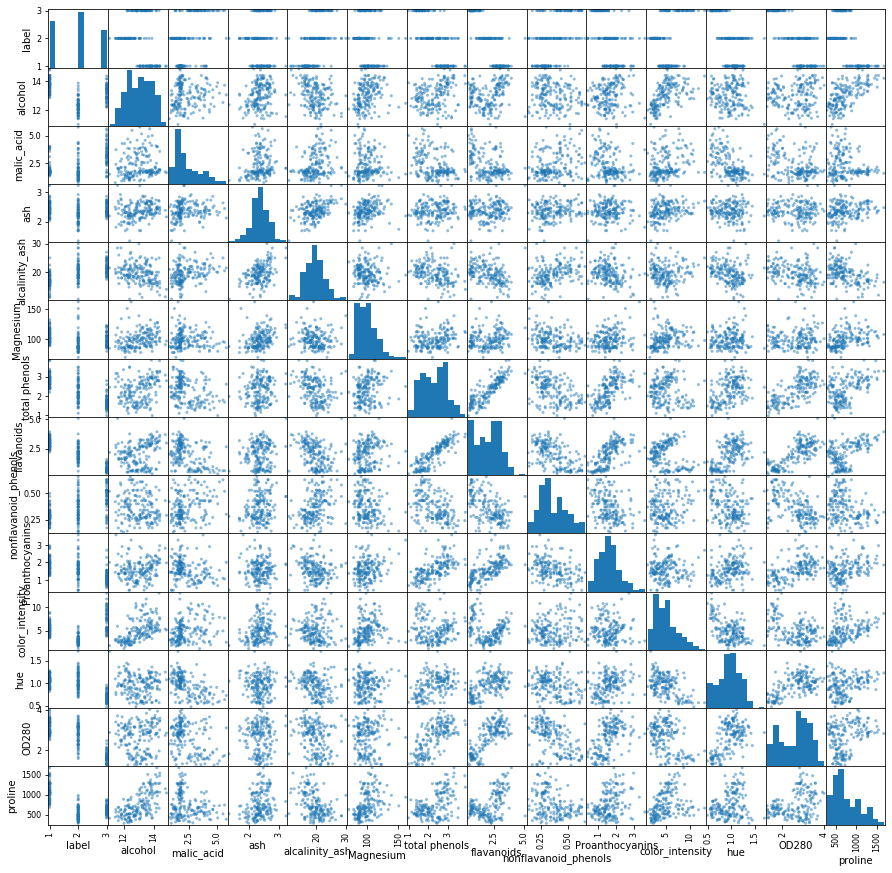

In [5]:
ax = pd.plotting.scatter_matrix(df,figsize=(15,15))

In [6]:
df['label'].value_counts()

2    71
1    59
3    48
Name: label, dtype: int64

In [7]:
corr = df.corr()

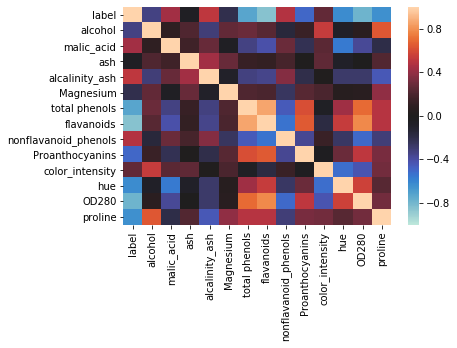

In [13]:
sns.heatmap(corr, center=0, vmax=1, vmin=-1)

In [14]:
model = GaussianNB()

In [15]:
X = df.iloc[:,1:].values
y = df['label'].values

In [16]:
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
predictions = model.predict(X)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score 

In [20]:
f1_score(y, predictions, average='macro')

0.9890197353534075

In [21]:
confusion_matrix(y, predictions)

array([[58,  1,  0],
       [ 0, 70,  1],
       [ 0,  0, 48]])

In [ ]:
x_vec = X[0,:]

In [ ]:
x_vec = x_vec.reshape(1,-1)

In [ ]:
cond_mean_arr

In [ ]:
cond_prior

In [ ]:
stats.norm.pdf(x_vec,loc = cond_mean_arr, scale = cond_std_arr)

In [ ]:
stats.norm.pdf(x_vec,loc = cond_mean_arr, scale = cond_std_arr).prod(axis=1)

In [ ]:
cond_prior = stats.norm.pdf(x_vec,loc = cond_mean_arr, scale = cond_std_arr).prod(axis=1)
uncond_prob = stats.norm.pdf(x_vec,loc = mean_arr, scale = std_arr).prod(axis=1)
result = cond_prior*c_prob/uncond_prob

In [ ]:
cond_prior

In [ ]:
uncond_prob

In [ ]:
result.argmax()

In [31]:
class My_Gauss_Naive_Bayes():
    def __init__(self):
        pass
    
    def fit(self, X ,y):
        data = np.concatenate((X,y.reshape(-1,1)), axis=1)
        
        #extract labels, count class labels and calculate class frequencies
        self.labels, class_count = np.unique(y, return_counts=True)
        self.class_frequencies = class_count / len(y)
        
        #get number of features
        feature_number = data.shape[1] - 1
        
        #concatenate training set with labels
        data = np.concatenate((X,np.expand_dims(y,axis=1)),axis=1)
        
        #define arrays, where i will save for each feature conditional mean and std respectively.
        self.cond_mean_arr = np.empty((len(self.labels),feature_number))
        self.cond_std_arr = np.empty((len(self.labels),feature_number))      
        
        #for each feature i calculate mean da std conditioned on label. 
        #for each feature i fit normal distribution's mean and std and save them to cond_mean_arr and cond_std_arr.
        for k, lab in enumerate(self.labels):
            for i in range(feature_number):
                self.cond_mean_arr[k,i], self.cond_std_arr[k,i] = stats.norm.fit(data[data[:,-1]==lab,i])
    
    
        #same as above, but now for each feature i calculate unconditional mean and std.
        self.mean_arr = np.empty((feature_number,))
        self.std_arr = np.empty((feature_number,))

        for i in range(feature_number):
            self.mean_arr[i], self.std_arr[i] = stats.norm.fit(data[:,i])
            
    
    def predict(self,x):
        cond_prior = stats.norm.pdf(x,loc = self.cond_mean_arr, scale = self.cond_std_arr).prod(axis=1)
        uncond_prob = stats.norm.pdf(x,loc = self.mean_arr, scale = self.std_arr).prod(axis=1)
        result = cond_prior * self.class_frequencies / uncond_prob
        
        return self.labels[np.argmax(result)]
        

In [32]:
my_gauss = My_Gauss_Naive_Bayes()

In [33]:
my_gauss.fit(X,y)

In [39]:
x_vec = X[0,:]
x_vec = x_vec.reshape(1,-1)

In [40]:
my_gauss.predict(x_vec)

1

In [41]:
predictions = [my_gauss.predict(np.expand_dims(x,axis=0)) for x in X]

In [42]:
f1_score(y,predictions, average='macro'), 

(0.9890197353534075,)

In [43]:
confusion_matrix(y, predictions)

array([[58,  1,  0],
       [ 0, 70,  1],
       [ 0,  0, 48]])